# Import libraries

In [227]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')
sns.set()

# Data Preprocessing & EDA

In [228]:
df = pd.read_csv('messages.csv')

In [229]:
df.head()

,date,message
0,2023-06-28 13:13:54+00:00,3 room Flat for rent. Saburtalo\n\nАдрес: pek...
1,2023-06-28 13:09:56+00:00,2 room Flat for rent. Sololaki\n\nАдрес: iash...
2,2023-06-28 13:09:13+00:00,3 room Flat for rent. Mukhiani\n\nАдрес: dumb...
3,2023-06-28 13:08:33+00:00,2 room Flat for rent. Elia\n\nАдрес: saingilo...
4,2023-06-28 13:06:57+00:00,2 room Flat for rent. Saburtalo\n\nАдрес: vaj...


## Feature extraction

In [293]:
print(df['message'][0])

3 room Flat for rent.  Saburtalo

Адрес: pekini st. ,

Дата: 28.06.2023 17:10
Этаж: 3
Площадь: 80 м²
Комнат: 3
Спален: 2
Комментарий: სასწრაფოდ! ქირავდება  საბურთალოზე   პეკინის  ქუჩაზე გარემონტებული 3 ოთახიანი კარგი ბინა 80კვმ მესამე სართულზე, ავეჯით  და ტექნიკით,აქვს მისაღები, სამზარეულო-  სასადილო, ერთი სველი წერტილი, 2 საძინებელი, აივანი,ცენტრალური გათბობა, კონდენციონერი,ყველანაირი საცხოვრებელი პირობებით, სრულად აღჭურვილი ავეჯით და ტექნიკით.
--------
Срочно! Сдается в Сабуртало, на улице Пекини, отремонтированная 3-комнатная квартира 80 кв.м на третьем этаже, с мебелью и техникой, имеет гостиную, кухню-столовую, один санузел, 2 спальни, балкон, центральное отопление, кондиционер, со всеми бытовыми условиями, полностью укомплектована мебелью и техникой.

Цена: 700$

Связь: WhatsApp (за неделю номер упоминался 8 раз, возможно это риелтор)

URL: ss.ge


In [231]:
floor_regex = r'Этаж: (\d+)'
area_regex = r'Площадь: (\d+) м²'
rooms_regex = r'Комнат: (\d+)'
bedrooms_regex = r'Спален: (\d+)'
district_regex = r'rent\. (.*)'
price_regex = r'Цена: (\d+)\$'

In [232]:
df['district'] = df['message'].str.extract(district_regex)
df['area'] = df['message'].str.extract(area_regex)
df['floor'] = df['message'].str.extract(floor_regex)
df['rooms'] = df['message'].str.extract(rooms_regex)
df['bedrooms'] = df['message'].str.extract(bedrooms_regex)
df['price'] = df['message'].str.extract(price_regex)

In [233]:
df.dropna(inplace=True)

In [234]:
df['district'] = df['district'].str.strip()
df['area'] = df['area'].str.strip().astype(float)
df['floor'] = df['floor'].str.strip().astype(int)
df['rooms'] = df['rooms'].str.strip().astype(int)
df['bedrooms'] = df['bedrooms'].str.strip().astype(int)
df['price'] = df['price'].str.strip().astype(int)

In [235]:
df = df[df['rooms'] <= 3]

In [236]:
df['date'] = pd.to_datetime(df['date']).dt.normalize()

In [237]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)
df

,date,message,district,area,floor,rooms,bedrooms,price
0,2023-06-28 00:00:00+00:00,3 room Flat for rent. Saburtalo\n\nАдрес: pek...,Saburtalo,80.0,3,3,2,700
1,2023-06-28 00:00:00+00:00,2 room Flat for rent. Sololaki\n\nАдрес: iash...,Sololaki,33.0,2,2,1,750
2,2023-06-28 00:00:00+00:00,3 room Flat for rent. Mukhiani\n\nАдрес: dumb...,Mukhiani,85.0,8,3,2,450
3,2023-06-28 00:00:00+00:00,2 room Flat for rent. Elia\n\nАдрес: saingilo...,Elia,40.0,1,2,1,360
4,2023-06-28 00:00:00+00:00,2 room Flat for rent. Saburtalo\n\nАдрес: vaj...,Saburtalo,37.0,6,2,1,470
...,...,...,...,...,...,...,...,...
50465,2022-06-06 00:00:00+00:00,2 room Flat for rent. Gldani\n\nАдрес: kerchi...,Gldani,65.0,5,2,1,500
50466,2022-06-06 00:00:00+00:00,2 room Flat for rent. Didi digomi\n\nАдрес: M...,Didi digomi,60.0,2,2,1,400
50467,2022-06-06 00:00:00+00:00,2 room Flat for rent. Saburtalo\n\nАдрес: nuc...,Saburtalo,35.0,5,2,1,350
50468,2022-06-06 00:00:00+00:00,Flat for rent. Saburtalo\n\nАдрес: Politkovsk...,Saburtalo,45.0,3,2,1,800


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50470 entries, 0 to 50469
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   date      50470 non-null  datetime64[ns, UTC]
 1   message   50470 non-null  object             
 2   district  50470 non-null  object             
 3   area      50470 non-null  float64            
 4   floor     50470 non-null  int64              
 5   rooms     50470 non-null  int64              
 6   bedrooms  50470 non-null  int64              
 7   price     50470 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(4), object(2)
memory usage: 3.1+ MB


## Analysis

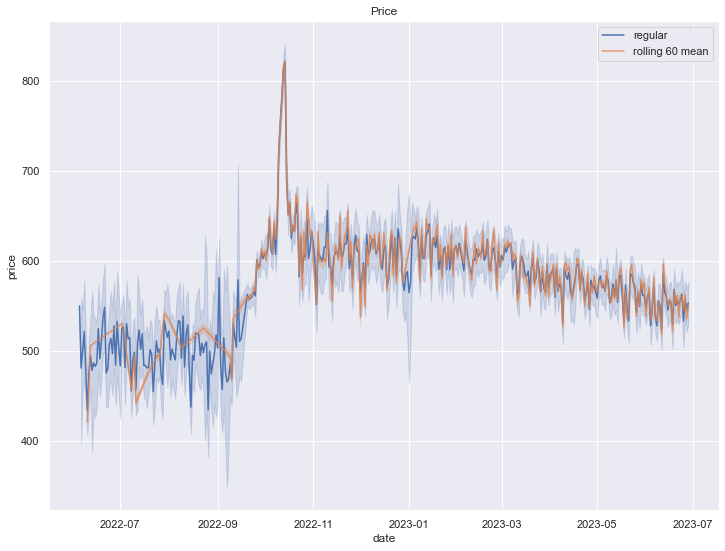

In [239]:
window_size = 60
weights = np.arange(1, window_size + 1)
data = df.groupby('date').rolling(window=window_size).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True).reset_index()

plt.figure(figsize=(12, 9))
sns.lineplot(data=df, x='date', y='price', label='regular')
sns.lineplot(data=data, x='date', y='price', label=f'rolling {window_size} mean', alpha=0.8)
    
plt.title('Price')
plt.show()

In [240]:
df.groupby('bedrooms').agg({'area':'mean', 'rooms':'mean', 'price':'mean', 'bedrooms':'count'}).rename(columns={'bedrooms':'ct'})

,area,rooms,price,ct
bedrooms,,,,
1,52.395386,1.904414,571.359777,35497
2,74.479785,2.958361,635.538885,14890
3,96.554217,3.000000,589.951807,83


In [241]:
df.groupby('rooms').agg({'area':'mean', 'price':'mean', 'rooms':'count'}).rename(columns={'rooms':'ct'})

,area,price,ct
rooms,,,
1,37.355722,484.169244,4526
2,54.210093,582.183991,30458
3,74.692884,637.362004,15486


In [242]:
df[['rooms', 'bedrooms']].value_counts().sort_index()

rooms  bedrooms
1      1            4526
2      1           29838
       2             620
3      1            1133
       2           14270
       3              83
dtype: int64

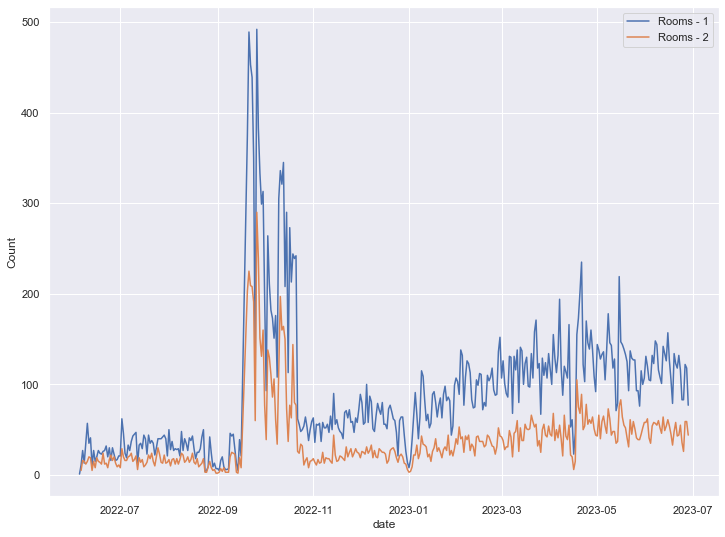

In [248]:
plt.figure(figsize=(12, 9))
for i in range(1, 3):
    rooms = df[df['bedrooms'] == i].groupby('date').nunique().reset_index()
    sns.lineplot(data=rooms, x='date', y='message', label=f'Rooms - {i}')
plt.ylabel('Count')
plt.show()

## Districts

In [390]:
districts = df.drop(columns=['message'])
districts

,date,district,area,floor,rooms,bedrooms,price
0,2023-06-28 00:00:00+00:00,Saburtalo,80.0,3,3,2,700
1,2023-06-28 00:00:00+00:00,Sololaki,33.0,2,2,1,750
2,2023-06-28 00:00:00+00:00,Mukhiani,85.0,8,3,2,450
3,2023-06-28 00:00:00+00:00,Elia,40.0,1,2,1,360
4,2023-06-28 00:00:00+00:00,Saburtalo,37.0,6,2,1,470
...,...,...,...,...,...,...,...
50465,2022-06-06 00:00:00+00:00,Gldani,65.0,5,2,1,500
50466,2022-06-06 00:00:00+00:00,Didi digomi,60.0,2,2,1,400
50467,2022-06-06 00:00:00+00:00,Saburtalo,35.0,5,2,1,350
50468,2022-06-06 00:00:00+00:00,Saburtalo,45.0,3,2,1,800


In [391]:
district_ct = districts['district'].value_counts().reset_index().rename(columns={'index':'district', 'district':'district_ct'})

In [392]:
merged_districts = districts.merge(district_ct, on='district', how='left')
merged_districts

,date,district,area,floor,rooms,bedrooms,price,district_ct
0,2023-06-28 00:00:00+00:00,Saburtalo,80.0,3,3,2,700,10159
1,2023-06-28 00:00:00+00:00,Sololaki,33.0,2,2,1,750,499
2,2023-06-28 00:00:00+00:00,Mukhiani,85.0,8,3,2,450,697
3,2023-06-28 00:00:00+00:00,Elia,40.0,1,2,1,360,89
4,2023-06-28 00:00:00+00:00,Saburtalo,37.0,6,2,1,470,10159
...,...,...,...,...,...,...,...,...
50465,2022-06-06 00:00:00+00:00,Gldani,65.0,5,2,1,500,4048
50466,2022-06-06 00:00:00+00:00,Didi digomi,60.0,2,2,1,400,6356
50467,2022-06-06 00:00:00+00:00,Saburtalo,35.0,5,2,1,350,10159
50468,2022-06-06 00:00:00+00:00,Saburtalo,45.0,3,2,1,800,10159


In [393]:
merged_districts = merged_districts[(merged_districts['district_ct'] > 10)]

In [394]:
date_dist = pd.DataFrame(merged_districts.groupby('date')['district'].value_counts()).rename(columns={'district':'ct'}).reset_index()
date_dist

,date,district,ct
0,2022-06-05 00:00:00+00:00,Digomi,1
1,2022-06-06 00:00:00+00:00,Saburtalo,4
2,2022-06-06 00:00:00+00:00,Varketili,3
3,2022-06-06 00:00:00+00:00,Didi digomi,2
4,2022-06-06 00:00:00+00:00,Digomi,2
...,...,...,...
8765,2023-06-28 00:00:00+00:00,Mtatsminda,1
8766,2023-06-28 00:00:00+00:00,Mukhiani,1
8767,2023-06-28 00:00:00+00:00,Samgori,1
8768,2023-06-28 00:00:00+00:00,Tbilisi sea,1


In [396]:
date_dist.groupby('district').median().sort_values('ct', ascending=False)

,ct
district,
Saburtalo,19.0
Didi digomi,14.0
Gldani,10.0
Isani,6.0
Varketili,6.0
Didube,6.0
Nadzaladevi,5.0
Digomi,5.0
Chugureti,4.0
